In [1]:
# Import Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statistics
import fastcluster
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from itertools import permutations
from scipy.spatial.distance import pdist, squareform
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

In [2]:
yeast = pd.read_csv('raw_cellcycle_384_17.txt', sep="\s+")
yeast_noindex = pd.read_csv('raw_cellcycle_384_17.txt', sep="\s+") 
yeast_columns = yeast_noindex.columns

categorical_features = ['Main','Gp']
numerical_features = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
                       'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17']
cat_data = yeast_noindex[categorical_features]

scaler = MinMaxScaler(feature_range=(-1, 1))
x = pd.DataFrame(scaler.fit_transform(yeast_noindex[numerical_features]))
x.columns = numerical_features
x_comb = pd.concat([cat_data, x], axis=1)
print(f'\n----> SCALED DATASET : \n\n{x_comb}')
s_row, s_col = x.shape

print(f'\n*\tSamples : {s_row}, Dimensions : {len(yeast_noindex.columns)}')

#sns.pairplot(data=x_comb, hue='diagnosis', height=2)
#plt.plot()


----> SCALED DATASET : 

        Main  Gp        c1        c2        c3        c4        c5        c6  \
0    YDL179w   1 -0.779939 -0.815516 -0.929740 -0.891010 -0.850285 -0.663037   
1    YLR079w   1 -0.576900 -0.642028 -0.811209 -0.817734 -0.722539 -0.626361   
2    YER111c   1 -0.899088 -0.861943 -0.903459 -0.943350 -0.951993 -0.946132   
3    YBR200w   1 -0.689970 -0.640806 -0.906141 -0.912562 -0.886086 -0.817765   
4    YJL194w   1 -0.910030 -0.701894 -0.936712 -0.953202 -0.922701 -0.863610   
..       ...  ..       ...       ...       ...       ...       ...       ...   
379  YOL070c   5 -0.497872 -0.533293 -0.762403 -0.757389 -0.680228 -0.332951   
380  YLR297W   5  0.381155 -0.208308 -0.607938 -0.482759 -0.248983 -0.093410   
381  YHL028W   5 -1.000000 -1.000000 -1.000000 -1.000000 -0.994304 -0.923209   
382  YHR151C   5 -0.956231 -0.945021 -0.980156 -0.971059 -0.977217 -0.962178   
383  YNL058C   5 -0.652280 -0.699450 -0.822473 -0.794335 -0.693247 -0.340974   

           c7

In [3]:
# Decomposition

# Calculate the co-variance matrix
cov_matrix = np.cov(x.T)

# Don't use SVD for decomposition, use linalg
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Print the sorted eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

eig_vals_total = sum(eigenvalues)
explained_variance = [(i / eig_vals_total)*100 for i in eigenvalues]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)
print('\nExplained variance             : {}'.format(explained_variance))

print('Cumulative explained variance  : {}'.format(cum_explained_variance))

Eigenvalues:
[9.70721554e-01 1.35477956e-01 7.79315613e-02 4.30329454e-02
 2.28870774e-02 1.36756961e-02 1.01125030e-02 8.08520197e-03
 7.92030443e-03 6.12138140e-03 3.84278683e-03 2.92053281e-03
 2.13010260e-03 1.92914456e-03 1.47863471e-03 1.16619191e-03
 8.70747266e-04]

Eigenvectors:
[[-2.42650998e-01 -1.71772712e-02 -4.16233081e-01  3.95012210e-01
  -6.40318231e-01 -1.89445417e-01 -1.04757111e-01 -3.03282252e-01
  -1.05988611e-01 -1.17048055e-01  1.43303055e-01  3.72007570e-02
  -2.24356701e-02  7.43882375e-02 -9.86890572e-02  7.68326905e-03
  -7.76942447e-04]
 [-2.73234532e-01 -3.00888805e-01 -3.10047674e-01  4.83718234e-01
   2.10829192e-01  4.36108338e-01  1.46265647e-01  3.69345789e-01
  -1.42382199e-01  2.26945631e-01 -1.31375792e-01 -3.24832698e-02
  -2.67441809e-03 -6.20082986e-02  1.00132240e-01 -9.09723042e-02
  -4.08312791e-04]
 [-1.71494510e-01 -3.86242224e-01  7.75986770e-03  1.72297402e-01
   3.21919004e-01 -2.47019648e-01  2.24127693e-01 -9.64989813e-02
   3.88855288


New projection:
            0         1         2         3         4         5     Main  Gp
0    2.831891  0.182514 -0.276445 -0.442410  0.062127  0.020870  YDL179w   1
1    2.456725  0.141941 -0.350241 -0.324034  0.007455  0.029278  YLR079w   1
2    3.748197  0.049427 -0.121866 -0.037324  0.071722  0.066269  YER111c   1
3    3.141074  0.347811 -0.241375  0.132668  0.156632  0.011835  YBR200w   1
4    3.550391  0.143225 -0.144599  0.014449  0.097380  0.145034  YJL194w   1
..        ...       ...       ...       ...       ...       ...      ...  ..
379  1.521265  0.924110 -0.122531 -0.116755  0.188213  0.034263  YOL070c   5
380 -0.266552  1.504752 -0.376388  0.238715  0.085140 -0.286331  YLR297W   5
381  3.826015  0.352084  0.008940 -0.022062  0.127445  0.084510  YHL028W   5
382  3.834911  0.210149 -0.070620 -0.037171  0.092041  0.055295  YHR151C   5
383  1.356777  1.212921 -0.055780 -0.369670  0.273551  0.039393  YNL058C   5

[384 rows x 8 columns]


[]

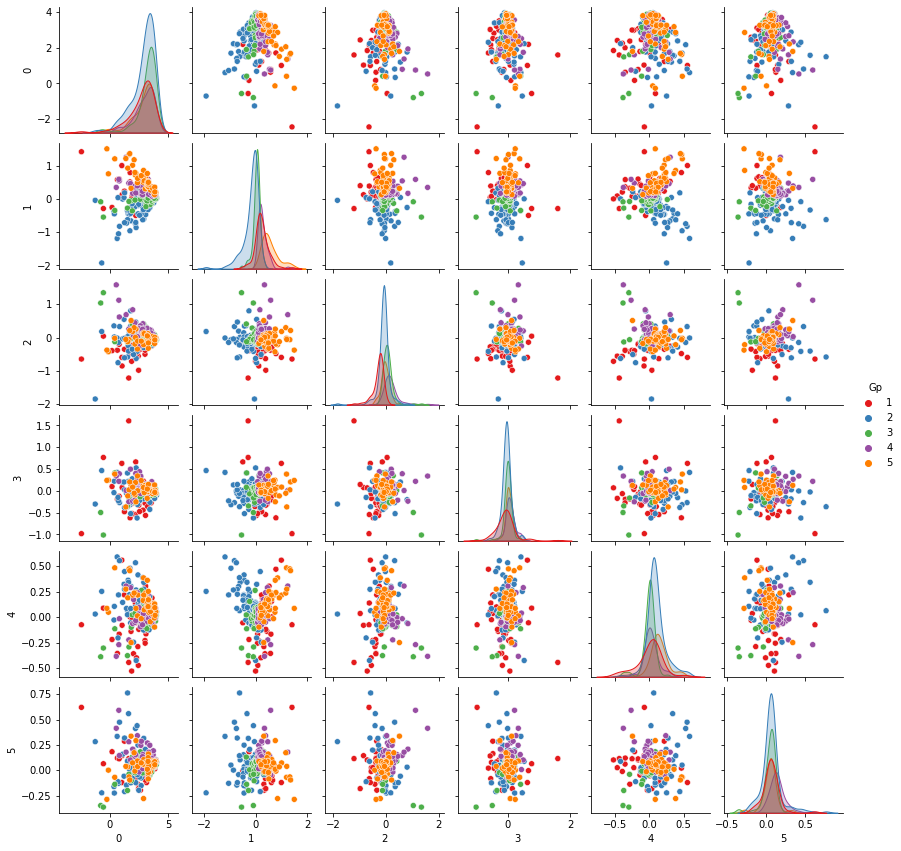

In [4]:
# Data Transformation.

# Select 'k' no of eigen vectors
k = 6
W = eigenvectors[:, :k] # Projection matrix

# Transform the original dataset
X_proj = x.dot(W)
X_proj_fin = pd.concat([X_proj, cat_data], axis=1)
print('\nNew projection:')
print(X_proj_fin)
#X_proj_pd = pd.DataFrame(X_proj)
#print(X_proj)

sns.pairplot(data=X_proj_fin, hue='Gp', height=2, palette="Set1")
plt.plot()

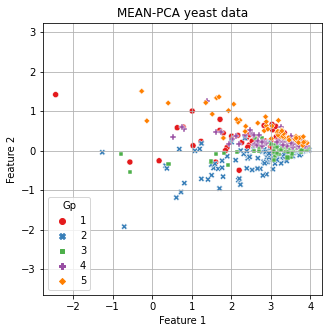

In [16]:
# Calculate the end points of the PC axes (scaled by the square root of the absolute eigenvalues)
pc_endpoints = eigenvectors * np.sqrt(np.abs(eigenvalues))
  
def Original():
    
    # Set the figure size
    plt.figure(figsize=(5, 5))

    df = pd.DataFrame(X_proj_fin)

    # Plot the DataFrame using Seaborn's scatterplot function
    sns.scatterplot(x=X_proj_fin[0], y=X_proj_fin[1],hue = X_proj_fin['Gp'], style=X_proj_fin['Gp'], data=df, palette="Set1" )

    # Show the plot
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('MEAN-PCA yeast data')
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    

Original()
#Transformed()

In [6]:
X_proj_1D = X_proj.to_numpy()
#X_proj_1D = X_proj.flatten()[::-1]

# Calculate the condensed distance matrix
condensed_dist_matrix = pdist(X_proj_1D)

# Convert the condensed distance matrix to a square distance matrix
dist_matrix = pd.DataFrame(squareform(condensed_dist_matrix))

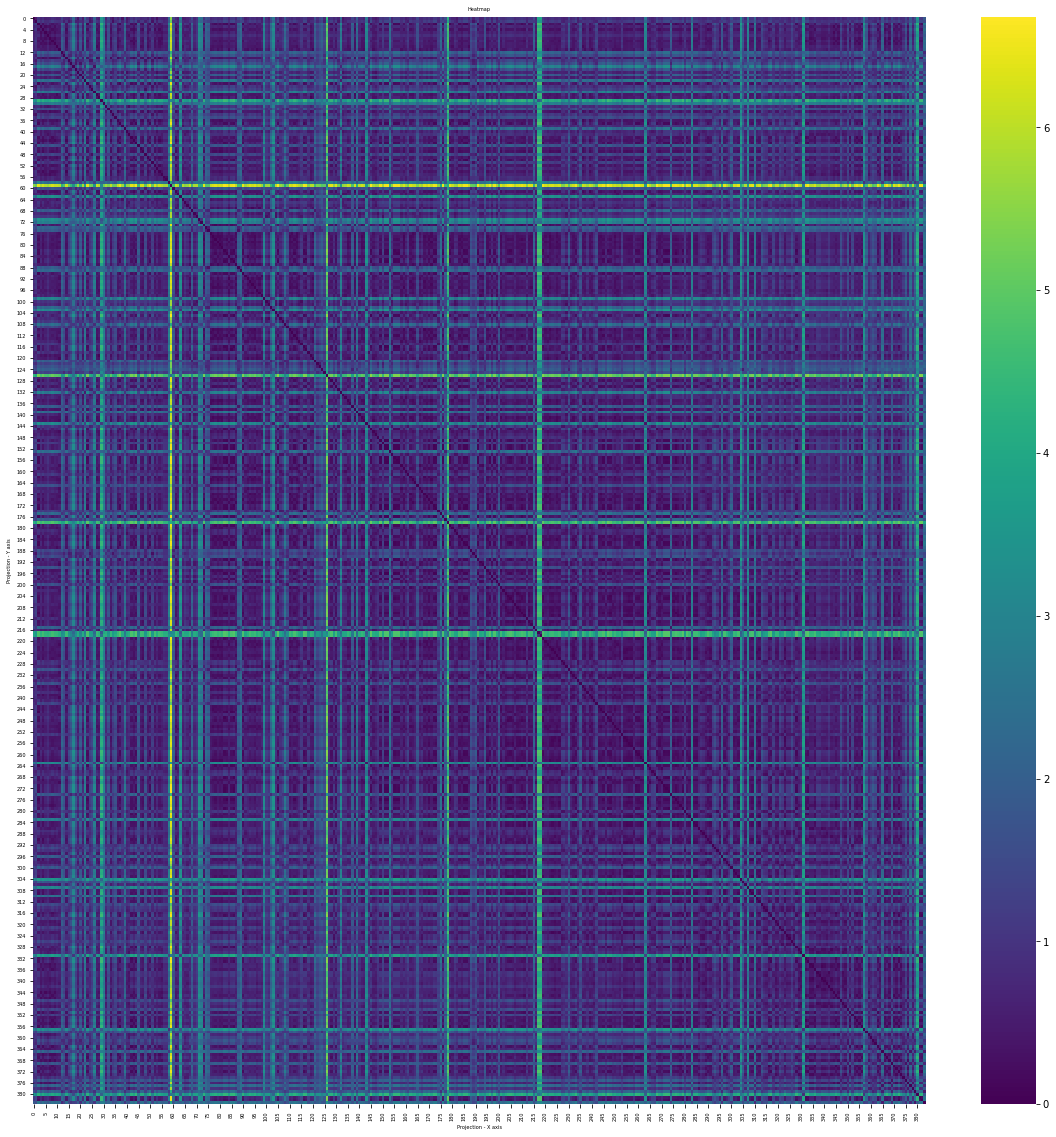

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(dist_matrix, cmap='viridis', annot=False, annot_kws={"size": 10})

title_fontsize = 5
label_fontsize = 5

plt.title('Heatmap', fontsize=title_fontsize)
plt.xlabel('Projection - X axis', fontsize=label_fontsize)
plt.ylabel('Projection - Y axis', fontsize=label_fontsize)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=label_fontsize)
ax.tick_params(axis='y', labelsize=label_fontsize)

plt.show()

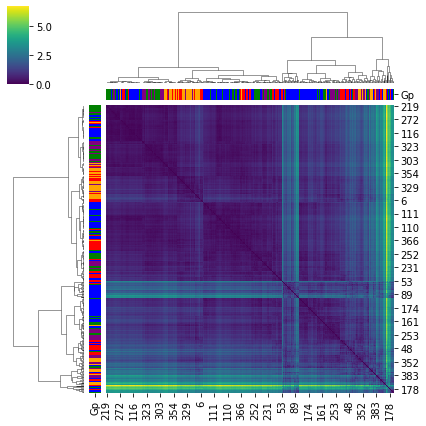

In [8]:
# Create a color mapping based on the species
species_color_mapping = X_proj_fin['Gp'].map({1: 'red', 2: 'blue', 3: 'green', 4: 'purple', 5: 'orange'})

# Create a clustermap using the distance matrix and fastcluster with matching colors
linkage_matrix = fastcluster.linkage(condensed_dist_matrix, method='ward')
sns.clustermap(dist_matrix, cmap='viridis', figsize=(6, 6), row_linkage=linkage_matrix, col_linkage=linkage_matrix,
               row_colors=species_color_mapping, col_colors=species_color_mapping)

# Show the plot
plt.show()

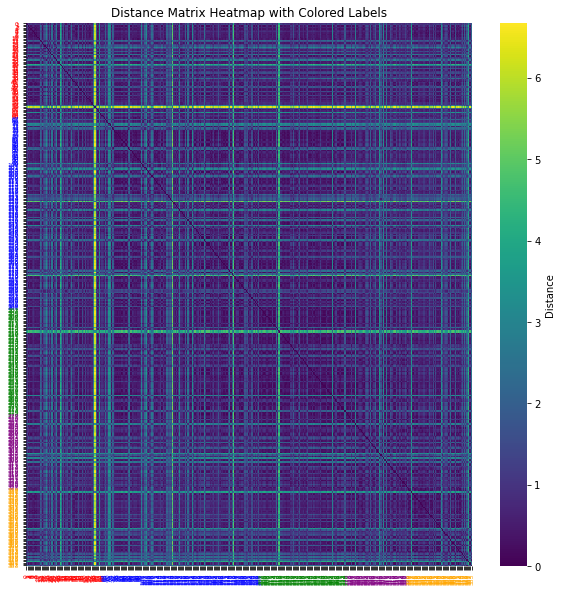

In [9]:
# Create a custom color mapping based on the species
species_color_mapping = X_proj_fin['Gp'].map({1: 'red', 2: 'blue', 3: 'green', 4: 'purple', 5: 'orange'})
# Plot the distance matrix heatmap with colored labels
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dist_matrix, cmap='viridis', ax=ax,
            cbar_kws={'label': 'Distance'})

# Set the tick labels and colors
ax.set_xticks(np.arange(dist_matrix.shape[0]) + 0.5)
ax.set_yticks(np.arange(dist_matrix.shape[0]) + 0.5)
ax.set_xticklabels(species_color_mapping.index, rotation=90, fontsize=6)
ax.set_yticklabels(species_color_mapping.index, rotation=0, fontsize=6)

# Color the tick labels
for tick, color in zip(ax.get_xticklabels(), species_color_mapping):
    tick.set_color(color)

for tick, color in zip(ax.get_yticklabels(), species_color_mapping):
    tick.set_color(color)

# Show the plot
plt.title('Distance Matrix Heatmap with Colored Labels')
plt.show()

In [10]:
# Dump to CSV

dist_matrix.to_csv('PCA-MEAN-yeast.csv', index=False)

In [11]:
X_proj_fin.iloc[[200]]

,0,1,2,3,4,5,Main,Gp
200,1.899535,-0.143004,-0.348822,0.275733,-0.076853,-0.075839,YNL310c,2


In [12]:
# Load Dataframe for K-nn
knn_df = X_proj_fin

# Select the columns corresponding to the features
features = knn_df[[0, 1, 2, 3, 4, 5]]

# Create a NearestNeighbors object
nbrs = NearestNeighbors(n_neighbors=21, algorithm='ball_tree').fit(features)

# Find the point in the dataset corresponding to point 200
point_200 = knn_df[knn_df['Main'] == 'YNL310c'][[0, 1, 2, 3, 4, 5]]

# Find the 10 nearest neighbors
distances, indices = nbrs.kneighbors(point_200)

# Print the ids and point numbers of the 10 nearest neighbors
neighbors_df = pd.DataFrame(columns=['Neighbor', 'ID', 'Gp'])
for i in range(1, len(indices[0])):
    neighbor_index = indices[0][i]
    neighbor_id = knn_df.loc[neighbor_index, 'Main']
    neighbor_point_no = knn_df.index[neighbor_index]
    neighbor_point_group = knn_df.loc[neighbor_index, 'Gp']
    print(f"Neighbor {i}: ID = {neighbor_id}, Point No. = {neighbor_point_no}, Gp = {neighbor_point_group}")
    neighbors_df = neighbors_df.append({ 'Neighbor': i, 'ID': neighbor_id, 'Point No Knn': neighbor_point_no, 'Gp': neighbor_point_group}, ignore_index=True)

# Number of nearest neighbors
k = 20

# Calculate the k-nearest neighbors from the distance matrix
nearest_neighbors = dist_matrix.iloc[200].values.argsort()[1:k+1]

# Create a DataFrame with the indices of the k-nearest neighbors
nearest_neighbors_df = pd.DataFrame(nearest_neighbors, columns=['Point No Dist Matrix'])
column_to_add = nearest_neighbors_df['Point No Dist Matrix']
neighbors_df = neighbors_df.join(column_to_add)

# Dump the dataset as a .csv file
neighbors_df.to_csv('knn_mean_pca.csv', index=False)

Neighbor 1: ID = YLR032w, Point No. = 109, Gp = 2
Neighbor 2: ID = YDL095w, Point No. = 235, Gp = 3
Neighbor 3: ID = YDR493w, Point No. = 190, Gp = 2
Neighbor 4: ID = YML061c, Point No. = 121, Gp = 2
Neighbor 5: ID = YKL066W, Point No. = 274, Gp = 3
Neighbor 6: ID = YGL055w, Point No. = 32, Gp = 1
Neighbor 7: ID = YJL196c, Point No. = 131, Gp = 2
Neighbor 8: ID = YDL124w, Point No. = 188, Gp = 2
Neighbor 9: ID = YPR120c, Point No. = 68, Gp = 2
Neighbor 10: ID = YKL163w, Point No. = 60, Gp = 1
Neighbor 11: ID = YGL200c, Point No. = 144, Gp = 2
Neighbor 12: ID = YBR052c, Point No. = 48, Gp = 1
Neighbor 13: ID = YBR104w, Point No. = 293, Gp = 4
Neighbor 14: ID = YKL045w, Point No. = 107, Gp = 2
Neighbor 15: ID = YGR183c, Point No. = 20, Gp = 1
Neighbor 16: ID = YOL019w, Point No. = 242, Gp = 3
Neighbor 17: ID = YDL010w, Point No. = 161, Gp = 2
Neighbor 18: ID = YKL069W, Point No. = 326, Gp = 4
Neighbor 19: ID = YDL138W, Point No. = 352, Gp = 5
Neighbor 20: ID = YOR065w, Point No. = 18, Gp

In [14]:
neighbors_df

,Neighbor,ID,Gp,Point No Knn,Point No Dist Matrix
0,1,YLR032w,2,109.0,109
1,2,YDL095w,3,235.0,235
2,3,YDR493w,2,190.0,190
3,4,YML061c,2,121.0,121
4,5,YKL066W,3,274.0,274
5,6,YGL055w,1,32.0,32
6,7,YJL196c,2,131.0,131
7,8,YDL124w,2,188.0,188
8,9,YPR120c,2,68.0,68
9,10,YKL163w,1,60.0,60
